# Question 1 
## Solved by - Nabiul Farhan Nabil

In [13]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA  # For dimensionality reduction and visualization

In [14]:
import warnings
import sys
import os
# Suppresses all warnings
warnings.filterwarnings("ignore")



In [15]:
# loading the data into a dataframe
df = pd.read_csv("Cars_data.csv")


In [16]:
# check the dataframe shape
df.shape

(11914, 16)

In [17]:
# drop duplicate rows
df = df.drop_duplicates()


In [18]:
# check duplicate rows
df.duplicated().sum()


0

In [19]:
# check the dataframe shape after dropping duplicates
df.shape

(11199, 16)

In [20]:
# checking datatype for each column
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [21]:
# iterate over columns to check the dtype object(string) and remove any spaces before/after the text (strip() function does the job)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip()

In [22]:
# check total missing values per column
print(df.isnull().sum())

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3376
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


## Explanation :
Looking at the requirements of this data analysis, we can give less importance to the missing values of "Market Category" column.
We can not drop/predict the missing values because its almost 30% of the dataset. it can affect the overall analysis. We can replace the missing column values with 'unknown category' instead.
For the  Engine Fuel Type, Engine HP, Engine Cylinders column the number of missing values is quite small. We can either drop the missing values or analyse more about the missing values and decide later.

In [23]:
# showing the unique values and their counts for the engine fuel type column, to understand the dataset better.
print(df['Engine Fuel Type'].value_counts())


Engine Fuel Type
regular unleaded                                6658
premium unleaded (required)                     1956
premium unleaded (recommended)                  1392
flex-fuel (unleaded/E85)                         887
diesel                                           150
electric                                          66
flex-fuel (premium unleaded required/E85)         53
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: count, dtype: int64


In [24]:
# showing the 3 missing values for the engine fuel type column. 
# This can be filled manually by looking the fuel type for the exact model on Google.
df[df['Engine Fuel Type'].isnull()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18499


In [25]:
# replacing the 3 missing values with 'regular unleaded'
df.loc[df['Engine Fuel Type'].isnull(), 'Engine Fuel Type'] = 'regular unleaded'

In [26]:
# recheck total missing values in Engine Fuel Type column
df[df['Engine Fuel Type'].isnull()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


## Instead of dropping or predicting the missing values of Market Category(3376), we can simply fill it with 'unknown category' and carry on our analysis.

In [27]:
# replacing the 3 missing values with 'regular unleaded'
df.loc[df['Market Category'].isnull(), 'Market Category'] = 'unknown category'

In [28]:
print(df['Market Category'].isnull().sum())

0


### I want to see how many rows are there with both missing values for Engine hp and Engine Cylinder columns.


In [29]:
len(df[df[['Engine HP', 'Engine Cylinders']].isna().all(axis=1)])


1

In [30]:
# I want to see the row are there with both missing values for Engine hp and Engine Cylinder column
df[df[['Engine HP', 'Engine Cylinders']].isna().all(axis=1)]


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
5778,Mitsubishi,i-MiEV,2014,electric,NaN,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Hatchback,Compact,4dr Hatchback,99,126,436,22995


In [31]:
# Filter rows where 'Engine Fuel Type' is 'electric' and select values from 'Engine Cylinders' column
print(df.loc[df['Engine Fuel Type'] == 'electric', 'Engine Cylinders'].value_counts())


Engine Cylinders
0.0    56
Name: count, dtype: int64


## so for all electric engines the cylinder value is 0
## Replace 'Engine Cylinders' values with 0 where 'Engine Fuel Type' is 'electric'

In [32]:

df.loc[df['Engine Fuel Type'] == 'electric', 'Engine Cylinders'] = 0


In [33]:
# I want to see the columns with missing values now
print(df.isnull().sum())

Make                  0
Model                 0
Year                  0
Engine Fuel Type      0
Engine HP            69
Engine Cylinders     20
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Market Category       0
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64


In [34]:
# lets see what are the 20 missging engine cylinder car models.
df[df[['Engine Cylinders']].isna().all(axis=1)]


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
8695,Mazda,RX-7,1993,regular unleaded,255.0,NaN,MANUAL,rear wheel drive,2.0,"Factory Tuner,Performance",Compact,Coupe,23,15,586,7523
8696,Mazda,RX-7,1994,regular unleaded,255.0,NaN,MANUAL,rear wheel drive,2.0,"Factory Tuner,Performance",Compact,Coupe,23,15,586,8147
8697,Mazda,RX-7,1995,regular unleaded,255.0,NaN,MANUAL,rear wheel drive,2.0,"Factory Tuner,Performance",Compact,Coupe,23,15,586,8839
8698,Mazda,RX-8,2009,premium unleaded (required),232.0,NaN,MANUAL,rear wheel drive,4.0,Performance,Compact,Coupe,22,16,586,31930
8699,Mazda,RX-8,2009,premium unleaded (required),212.0,NaN,AUTOMATIC,rear wheel drive,4.0,Performance,Compact,Coupe,23,16,586,26435
8700,Mazda,RX-8,2009,premium unleaded (required),232.0,NaN,MANUAL,rear wheel drive,4.0,Performance,Compact,Coupe,22,16,586,27860
8701,Mazda,RX-8,2009,premium unleaded (required),232.0,NaN,MANUAL,rear wheel drive,4.0,Performance,Compact,Coupe,22,16,586,31000
8702,Mazda,RX-8,2009,premium unleaded (required),232.0,NaN,MANUAL,rear wheel drive,4.0,Performance,Compact,Coupe,22,16,586,26435
8703,Mazda,RX-8,2009,premium unleaded (required),212.0,NaN,AUTOMATIC,rear wheel drive,4.0,Performance,Compact,Coupe,23,16,586,31700
8704,Mazda,RX-8,2009,premium unleaded (required),212.0,NaN,AUTOMATIC,rear wheel drive,4.0,Performance,Compact,Coupe,23,16,586,28560


### as all of them from the same company,Mazda, we can google it and fill the missing values easily. ref: https://www.quora.com/How-many-cylinders-are-there-in-rotary-engines


In [35]:
# Fill missing values in 'Engine Cylinders' based on model type
df.loc[(df['Engine Cylinders'].isna()) & (df['Model'] == 'RX-7'), 'Engine Cylinders'] = 3
df.loc[(df['Engine Cylinders'].isna()) & (df['Model'] == 'RX-8'), 'Engine Cylinders'] = 6


In [36]:
# I want to see the columns with missing values after minimizing
print(df.isnull().sum())

Make                  0
Model                 0
Year                  0
Engine Fuel Type      0
Engine HP            69
Engine Cylinders      0
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Market Category       0
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64


In [37]:
len(df[df['Engine Fuel Type'] == 'electric'])


66

In [38]:
# Filter rows where 'Engine Fuel Type' is 'electric' and select 'Engine HP' column
print(df.loc[df['Engine Fuel Type'] == 'electric', 'Engine HP'].value_counts())


Engine HP
140.0    6
115.0    4
170.0    4
177.0    3
200.0    2
66.0     2
154.0    1
Name: count, dtype: int64


In [39]:
# Filter rows where 'Engine HP' is missing and 'Engine Fuel Type' is 'electric'
len(df[(df['Engine HP'].isna()) & (df['Engine Fuel Type'] == 'electric')])



44

##### So among 66 electric vehicles 44 of them do not have any HP value. If we drop this we can lose a big chunk of electric vehicles data. As most of the vehicles of this category have avg HP between 100-200, we can get the mean and median of these values and fill the missing values randomly. It will prevent the bias to some extend. It may not be the accurate value, but it will do the data analysis job. But if we need to focus on the accuracy, we may want to drop this rows.

In [40]:
# Filter rows where 'Engine Fuel Type' is 'electric'
electric_df = df[df['Engine Fuel Type'] == 'electric']
mean_engine_hp = electric_df['Engine HP'].mean()
median_engine_hp = electric_df['Engine HP'].median()
# Round up the mean value
mean_engine_hp_rounded = np.ceil(mean_engine_hp)
# Randomly select between mean and median for each missing value
missing_values_indices = df[(df['Engine HP'].isna()) & (df['Engine Fuel Type'] == 'electric')].index
random_values = np.random.choice([mean_engine_hp_rounded, median_engine_hp], size=len(missing_values_indices))

# Fill missing values with random values
df.loc[missing_values_indices, 'Engine HP'] = random_values



In [41]:
# recheck missing values
len(df[(df['Engine HP'].isna()) & (df['Engine Fuel Type'] == 'electric')])


0

In [42]:
# I want to see the columns with missing values after minimizing
print(df.isnull().sum())

Make                  0
Model                 0
Year                  0
Engine Fuel Type      0
Engine HP            25
Engine Cylinders      0
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Market Category       0
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64


In [43]:
# lets see the rest 25 missing HP values rows.
print("number of missing value rows for HP : ",len(df[(df['Engine HP'].isna())]))
print("The Rows Are : ") 
df[(df['Engine HP'].isna())]


number of missing value rows for HP :  25
The Rows Are : 


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
2905,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Large,Sedan,25,17,61,55915
2906,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Large,Sedan,27,18,61,62915
2907,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Large,Sedan,27,18,61,53915
2908,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Large,Sedan,25,17,61,64915
4203,Ford,Escape,2017,regular unleaded,NaN,4.0,AUTOMATIC,front wheel drive,4.0,Crossover,Compact,4dr SUV,30,23,5657,29100
4204,Ford,Escape,2017,regular unleaded,NaN,4.0,AUTOMATIC,all wheel drive,4.0,Crossover,Compact,4dr SUV,28,22,5657,30850
4205,Ford,Escape,2017,regular unleaded,NaN,4.0,AUTOMATIC,all wheel drive,4.0,Crossover,Compact,4dr SUV,28,22,5657,26850
4206,Ford,Escape,2017,regular unleaded,NaN,4.0,AUTOMATIC,front wheel drive,4.0,Crossover,Compact,4dr SUV,30,23,5657,25100
4914,Ford,Freestar,2005,regular unleaded,NaN,6.0,AUTOMATIC,front wheel drive,4.0,unknown category,Midsize,Passenger Minivan,22,16,5657,28030
4915,Ford,Freestar,2005,regular unleaded,NaN,6.0,AUTOMATIC,front wheel drive,4.0,unknown category,Midsize,Passenger Minivan,22,16,5657,23930


In [44]:
df[(df['Number of Doors'].isna())]


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4666,Ferrari,FF,2013,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,NaN,"Exotic,High-Performance",Large,Coupe,16,11,2774,295000
6930,Tesla,Model S,2016,electric,140.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,105,102,1391,79500
6931,Tesla,Model S,2016,electric,140.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,101,98,1391,66000
6932,Tesla,Model S,2016,electric,146.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,High-Performance",Large,Sedan,105,92,1391,134500
6933,Tesla,Model S,2016,electric,140.0,0.0,DIRECT_DRIVE,rear wheel drive,NaN,"Exotic,Performance",Large,Sedan,100,97,1391,74500
6934,Tesla,Model S,2016,electric,146.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,107,101,1391,71000


### We can see only two company's vehicle got no door value. We can fill it manually, with the information from Google.


In [45]:
# Fill missing values with 4 where 'Make' column is 'Tesla'
df.loc[(df['Number of Doors'].isna()) & (df['Make'] == 'Tesla'), 'Number of Doors'] = 4


In [46]:
df.loc[(df['Number of Doors'].isna()) & (df['Make'] == 'Ferrari'), 'Number of Doors'] = 2


In [47]:
# I want to see the columns with missing values after minimizing
print(df.isnull().sum())

Make                  0
Model                 0
Year                  0
Engine Fuel Type      0
Engine HP            25
Engine Cylinders      0
Transmission Type     0
Driven_Wheels         0
Number of Doors       0
Market Category       0
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64


## We have minimized the number of missing values through multiple different techniques. Below shared before and after minimizing the missing value numbers :

before -- 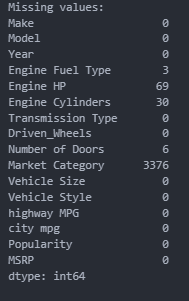  --- after 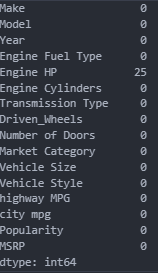 

#### The rest 25 engine HP values seems not following any pattern or can not  be filled manually in a easy way. So we can drop these.

In [48]:
df.dropna(inplace=True)


In [49]:
df.shape

(11174, 16)

## 3.	Use data visualization to highlight and summarize the relations between:
### a.	Engine horsepower and city mileage 
### b.	Transmission type and vehicle style
### c.	Transmission type and engine horsepower
### d.	Correlation between all numerical columns 

## I wanted to see the data distribution and as well as the trend. But while using the Line plot, I realized this is not perfectly understandable. Instead I tried with scatterplot and added Linear regression to get the trend line on the graph.

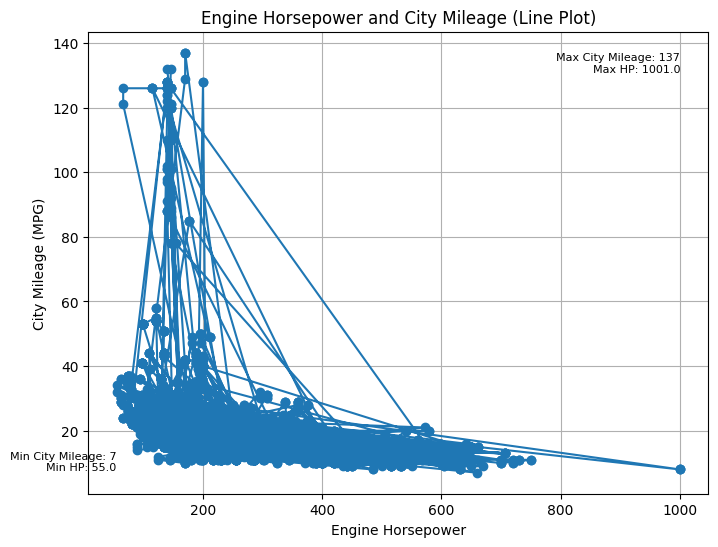

In [50]:
# Calculate max and min values
max_city_mileage = df['city mpg'].max()
min_city_mileage = df['city mpg'].min()
max_engine_hp = df['Engine HP'].max()
min_engine_hp = df['Engine HP'].min()

# Create line plot
plt.figure(figsize=(8, 6))
plt.plot(df['Engine HP'], df['city mpg'], marker='o', linestyle='-')

# Annotate max and min city mileage
plt.text(df['Engine HP'].max(), max_city_mileage, f'Max City Mileage: {max_city_mileage}\nMax HP: {max_engine_hp}', ha='right', va='top', fontsize=8)
plt.text(df['Engine HP'].min(), min_city_mileage, f'Min City Mileage: {min_city_mileage}\nMin HP: {min_engine_hp}', ha='right', va='bottom', fontsize=8)

# Customize the plot
plt.xlabel("Engine Horsepower")
plt.ylabel("City Mileage (MPG)")
plt.title("Engine Horsepower and City Mileage (Line Plot)")
plt.grid(True)
plt.show()


## Now this graph below is quite fresh. We can see the min and max values for both HP and Mileage. As well as we can observe the trend. It is visible that with the increase of HP, the mileage is decreasing. It is of course a overall understanding about the relationship between City mileage and engine horsepower.

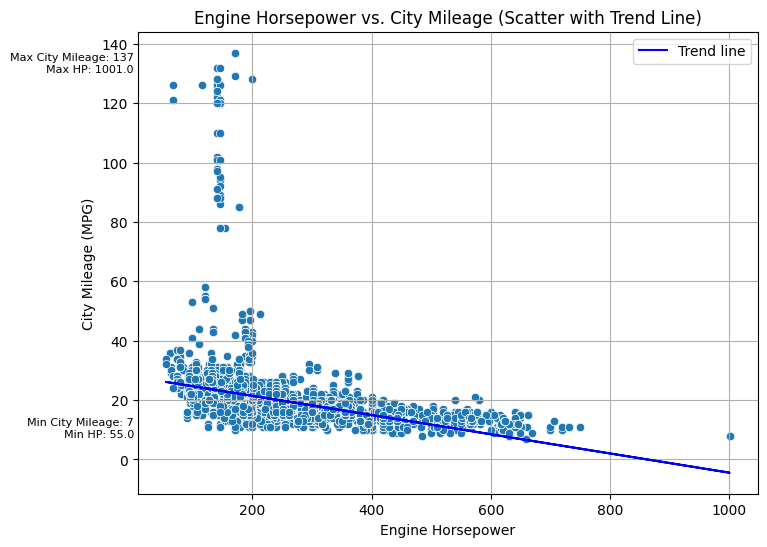

In [51]:
from sklearn.linear_model import LinearRegression

# Linear Regression (for reference line)
model = LinearRegression()
model.fit(df[['Engine HP']], df['city mpg'])
predicted_mpg = model.predict(df[['Engine HP']])

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Engine HP", y="city mpg", data=df)
x_offset = 0.1
y_offset = 0.1 

# Plot the regression line
plt.plot(df['Engine HP'], predicted_mpg, color='blue', label='Trend line')

# Annotate max and min city mileage (optional)
plt.text(
    1 + x_offset,  # Adjust x-coordinate (slightly greater than max HP for right placement)
    max_city_mileage + y_offset,  # Adjust y-coordinate (slightly higher than max MPG for top placement)
    f'Max City Mileage: {max_city_mileage}\nMax HP: {max_engine_hp}',
    ha='right', va='top', fontsize=8
)

plt.text(
    1 + x_offset,
    min_city_mileage - y_offset,
    f'Min City Mileage: {min_city_mileage}\nMin HP: {min_engine_hp}',
    ha='right', va='bottom', fontsize=8
)

# Customize the plot
plt.xlabel("Engine Horsepower")
plt.ylabel("City Mileage (MPG)")
plt.title("Engine Horsepower vs. City Mileage (Scatter with Trend Line)")
plt.grid(True)
plt.legend()  # Add legend for clarity
plt.show()


## Now we will see the frequency of Vehicle Styles (differentiated by colors) grouped by Transmission types.

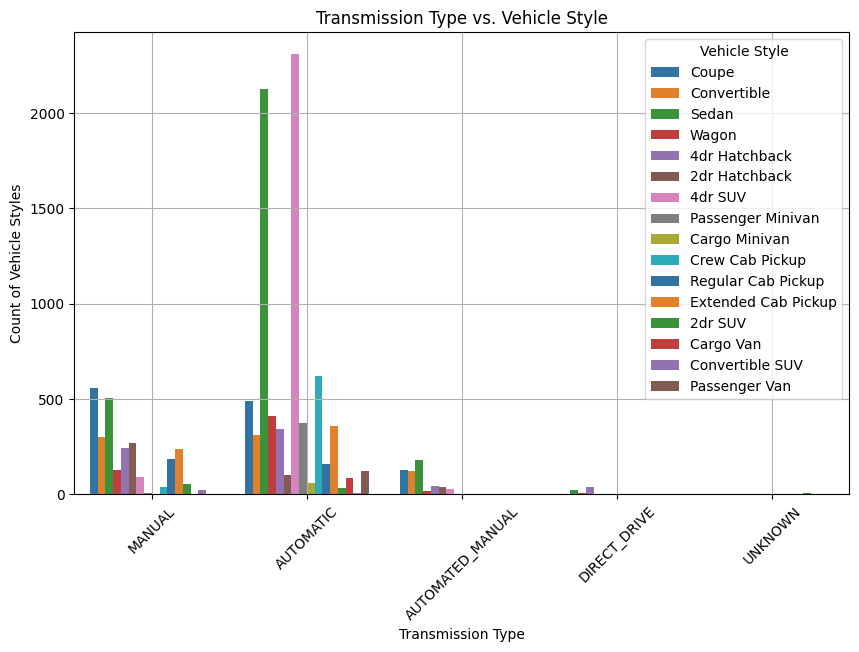

In [52]:
# Define custom colors
custom_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(x="Transmission Type", hue="Vehicle Style", data=df, palette=custom_colors)
plt.xlabel("Transmission Type")
plt.ylabel("Count of Vehicle Styles")
plt.title("Transmission Type vs. Vehicle Style")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Now we will see the engine horsepower grouped by Transmission types. We can see the mean value of engine horsepower in the box plot.

Automated mannual: The box for Automated mannual transmissions is the widest, which means there's a larger spread of data points in the middle 50% of horsepower for Automated mannual compared to the other transmissions. 

Mannual: The box for Mannual transmissions is shorter and the whiskers are not as long, which means the middle 50% of horsepower data points are more clustered together.

Automatic: The box for Automatic transmissions is similar in width to the box for Mannual transmissions.


Direct Drive: The box for Direct Drive is the narrowest and the whiskers are short, which means there is the least spread in horsepower data points among all transmission types.

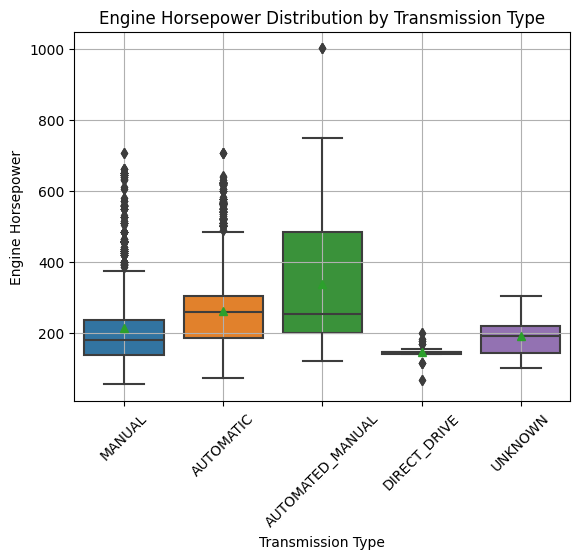

In [53]:
# Created a boxplot to visualize the distribution of engine horsepower across different transmission types
sns.boxplot(
    x = "Transmission Type",
    y = "Engine HP",
    showmeans=True,  
    data=df
)

# Customize the plot for better readability
plt.xlabel("Transmission Type")
plt.ylabel("Engine Horsepower")
plt.title("Engine Horsepower Distribution by Transmission Type")
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()


## A correlation matrix helps to understand the relationships between the values of the selected columns.

A correlation coefficient of 1 indicates a perfect positive linear relationship, where as the value of one variable increases the value of the other variable also increases proportionally.
A correlation coefficient of -1 indicates a perfect negative linear relationship, where as the value of one variable increases the value of the other variable decreases proportionally.

Like, There is a moderate positive correlation between engine horsepower and the number of engine cylinders. This means that cars with more horsepower tend to also have more engine cylinders.
And there is a negative correlation between engine cylinders and city mileage also highway milage. It means the more cylinder the vehicle got the less mileage it gives.

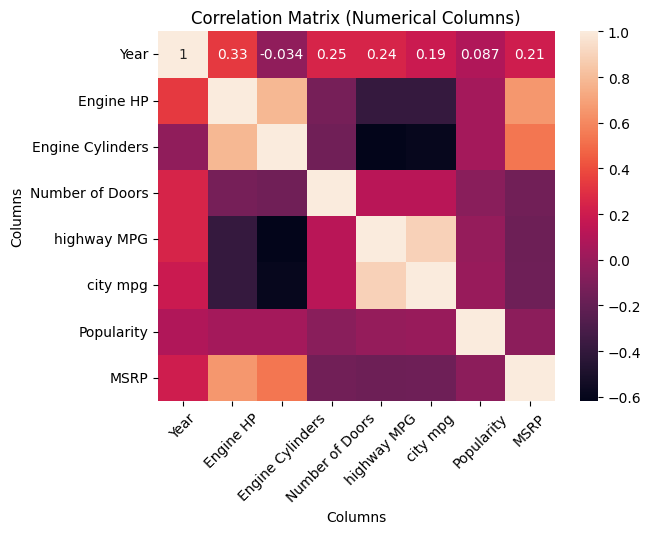

In [54]:
# Create a correlation matrix
# Drop 'cluster' column
df_numeric = df.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = df_numeric.corr()
# Create a heatmap to visualize the correlations
sns.heatmap(correlation_matrix, annot=True)  # Annotate with correlation values

# Customize the plot for better readability
plt.xlabel("Columns")
plt.ylabel("Columns")
plt.title("Correlation Matrix (Numerical Columns)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Rotate y-axis labels for better readability
plt.show()


# Cluster similar groups in the data.

StandardScaler subtracts the mean of each feature from each data point in that feature's column. This essentially removes any bias introduced by the original data having a specific non-zero mean value.it also divides each data point by the standard deviation of the corresponding feature after centering. This ensures all features have a similar range of values, around 0 with a standard deviation of 1. there are numbers in different ranges, like the cylinders are in single numbers on the other hand the HP or MPG are in multiple digits. So this scaling is necessary for this dataset.

In [55]:

# Selected features for clustering. Selected the columns with numerical values.
features = ["Engine HP", "city mpg", "highway MPG", "Engine Cylinders"]
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)  # Scaled features

# Defining the number of clusters (experimented with different values)
k = 3
# k = 5 
# k = 6 
# k = 7 

# kmeans model
kmeans = KMeans(n_clusters=k, random_state=10) 
kmeans.fit(df_scaled)
df['cluster'] = kmeans.labels_

In [56]:
df['cluster'].value_counts()

cluster
0    6409
1    4698
2      67
Name: count, dtype: int64

In [57]:
# Silhouette Analysis (evaluate cluster quality)
# its good if near .50. Its at its best if between .50 and 1 or close to 1.
# got the best cluster with k=3 
from sklearn.metrics import silhouette_score
silhouette_coeff = silhouette_score(df_scaled, kmeans.labels_)
print("Silhouette Coefficient:", silhouette_coeff)  # Higher values indicate better separation



Silhouette Coefficient: 0.4475455344329785


### The cluster is more clearly seperateable with k=3 value.

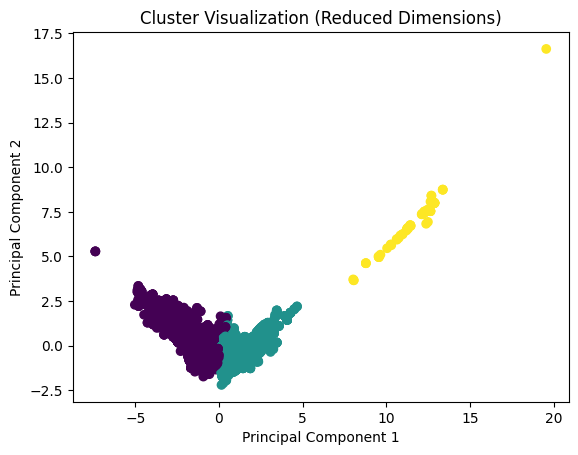

In [58]:
# Visualization: Reduced dimensionality to 2 and created a scatter plot with cluster colors
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=df['cluster'])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Cluster Visualization (Reduced Dimensions)")
plt.show()
